# テキストマイニング: Twitter

## 1. はじめに
### 1.1. 本日のゴール

**「テキストって数字みたいに分析できるのか。」**と一瞬でも感じること。

### 1.2. テキストマイニングとは？

- テキスト（文字）を定量的に分析する手法。具体的には、
 - 形態素解析: テキストを単語レベルに分割する
 - wordcloud: 単語の出現頻度を可視化する
 - 共起ネットワーク: 単語間の繋がりを可視化する
 - word2vec(自然言語処理): 深層学習モデルにテキストデータを入力出来るようにする
- ユーザーのレビューデータやSNSの投稿、アンケートの自由記述欄が主な対象
 - レビューデータやSNSの投稿はWebスクレイピングやAPIを使えば簡単に取得できる 

### 1.3. ハンズオンのお題

- みなさんはECサイトでスキーウェアを販売するB社の売り上げ向上プロジェクトにアサインされました。
- 先方は特に子供向けのスキーウェアの売り上げがイマイチ伸びないことを問題視しています。
- みなさんの中で議論をした結果、CVRが低いことから商品をうまく訴求出来ていないことが1つの仮説として浮かんできました。
- そこで、B社子供向けのスキーウェアを購入したユーザーのレビューを収集し、テキストマイニングでユーザーの声を定量的に評価することにしました。

### 1.4. ハンズオンの構成

2. **[データの前処理](#first-bullet)**
3. **[形態素解析](#second-bullet)**
4. **[テキストの出現頻度の可視化; Wordcloud](#third-bullet)**
5. **[テキストの繋がり; 共起ネットワーク](#fourth-bullet)**
6. **[おわりに](#final-bullet)**
 1. 案件事例 by 難波くん

## 2. データの前処理<a class="anchor" id="first-bullet"></a>
### 2.1. 読み込み

In [2]:
import pandas as pd

In [29]:
df_high = pd.read_csv("rakuten_review_high.csv", header = None)
df_high.head()

,0
0,身長107センチ、体重18キロ、5歳の男児用に120センチを購入したところ、ママ！大人のが届...
1,安く買えて良かったです。\n身長140センチで150サイズ買いましたが、裾の調整で問題なさそ...
2,143センチの息子に150を購入。少し大き目でしたがベルト部分や袖の長さを調節できたので問題...
3,色、柄とも豊富で、どれもステキです。\n145cmですが150cmのサイズで\n大きいかな…...
4,注文してからすぐに届きました！\n商品もかっこ良くて気に入りました！\nまだ実際に使用してい...


In [31]:
df_high[0] = df_high[0].str.replace('\n', '')
df_high.head()

,0
0,身長107センチ、体重18キロ、5歳の男児用に120センチを購入したところ、ママ！大人のが届...
1,安く買えて良かったです。身長140センチで150サイズ買いましたが、裾の調整で問題なさそうです。
2,143センチの息子に150を購入。少し大き目でしたがベルト部分や袖の長さを調節できたので問題...
3,色、柄とも豊富で、どれもステキです。145cmですが150cmのサイズで大きいかな…って感じ...
4,注文してからすぐに届きました！商品もかっこ良くて気に入りました！まだ実際に使用していないので...


## 3. 形態素解析<a class="anchor" id="second-bullet"></a>

- 形態素解析とは、「」
- 形態素解析のライブラリとして、Mecabやjanomeがあります。
 - Mecabの方が新しい単語にも対応している。（「インスタ映え」とか。）その一方で、設定が少しめんどくさい。
 - 今回はjanomeを使ってみます。
- 参考資料
 - [janomeの基本的な使い方](https://note.nkmk.me/python-janome-tutorial/)

### 3.1. janomeの基本的な使い方

In [34]:
from janome.tokenizer import Tokenizer

#### 3.1.1. 単語に分割

In [35]:
t = Tokenizer()
text = '本日はデータサイエンス×マーケティング勉強会に参加していただき、ありがとうございます。'
result = t.tokenize(text)

In [36]:
result

<generator object Tokenizer.__tokenize_stream at 0x11f557510>

In [37]:
for token in result:
    print(token)

本日	名詞,副詞可能,*,*,*,*,本日,ホンジツ,ホンジツ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
データ	名詞,一般,*,*,*,*,データ,データ,データ
サイエンス	名詞,一般,*,*,*,*,サイエンス,サイエンス,サイエンス
×	記号,一般,*,*,*,*,×,カケル,カケル
マーケティング	名詞,一般,*,*,*,*,マーケティング,マーケティング,マーケティング
勉強	名詞,サ変接続,*,*,*,*,勉強,ベンキョウ,ベンキョー
会	名詞,接尾,一般,*,*,*,会,カイ,カイ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
参加	名詞,サ変接続,*,*,*,*,参加,サンカ,サンカ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
いただき	動詞,非自立,*,*,五段・カ行イ音便,連用形,いただく,イタダキ,イタダキ
、	記号,読点,*,*,*,*,、,、,、
ありがとう	感動詞,*,*,*,*,*,ありがとう,アリガトウ,アリガトー
ござい	助動詞,*,*,*,五段・ラ行特殊,連用形,ござる,ゴザイ,ゴザイ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
。	記号,句点,*,*,*,*,。,。,。


In [38]:
t = Tokenizer()
text = '本日はデータサイエンス×マーケティング勉強会に参加していただき、ありがとうございます。'
result = t.tokenize(text)

list(result)

これら`<janome.tokenizer.Token at ...>`に分割した単語の情報が格納されている。それぞれに関してみていくために、for構文で`print()`させていた。

#### 3.1.2. 表層型と基本形

In [39]:
t = Tokenizer()
text = '本日はデータサイエンス×マーケティング勉強会に参加していただき、ありがとうございます。'
result = t.tokenize(text)

print("表層形"+ "|" +"基本形")
print("==================================")
print("\n")

for token in result:
    print(token.surface + "|" + token.base_form)

表層形|基本形


本日|本日
は|は
データ|データ
サイエンス|サイエンス
×|×
マーケティング|マーケティング
勉強|勉強
会|会
に|に
参加|参加
し|する
て|て
いただき|いただく
、|、
ありがとう|ありがとう
ござい|ござる
ます|ます
。|。


#### 3.1.3. 特定の品詞の文字列を抽出する

In [58]:
t = Tokenizer()
text = '本日は'
result = t.tokenize(text)
for token in result:
    #品詞を抽出
    pos = token.part_of_speech.split(',')

In [59]:
pos

['助詞', '係助詞', '*', '*']

In [46]:
t = Tokenizer()
text = '本日はデータサイエンス×マーケティング勉強会に参加していただき、ありがとうございます。'
result = t.tokenize(text)

words = []

for token in result:
    #品詞から名詞だけ抽出
    pos = token.part_of_speech.split(',')[0]
    
    if pos == '名詞':
        words.append(token.base_form)

In [47]:
words

['本日', 'データ', 'サイエンス', 'マーケティング', '勉強', '会', '参加']

### 3.2. レビューデータを形態素解析にかけてみる

In [82]:
list_high = df_high[0].values.tolist()

In [85]:
# リストを文字列に変換
list_test = ','.join(list_high)

In [90]:
t = Tokenizer()
text = list_test
result = t.tokenize(text)

words = []

for token in result:
    #品詞から名詞だけ抽出
    pos = token.part_of_speech.split(',')[0]
    
    if pos == '名詞':
        words.append(token.base_form)

## 4. テキストの出現頻度の可視化; Wordcloud<a class="anchor" id="third-bullet"></a>

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [91]:
# リストを文字列に変換
word_chain = ' '.join(words)

レビュー123


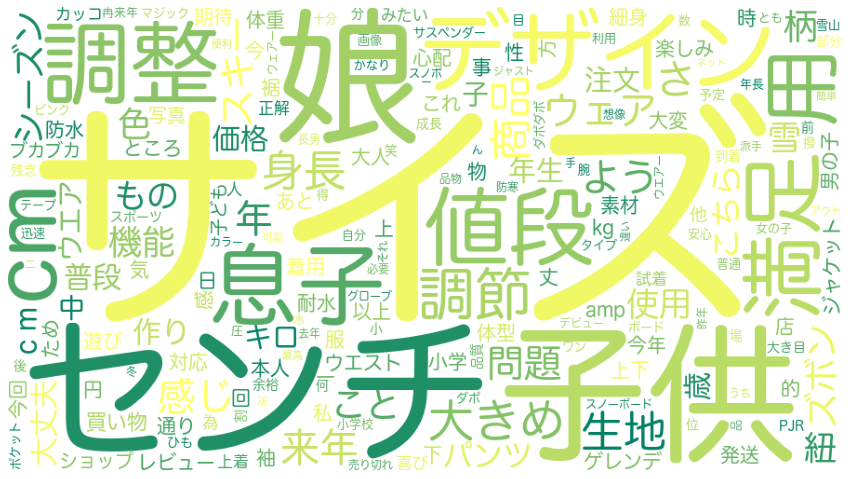

In [92]:
stop_word = [u'の', u'購入', u'そう', u'良い']

# ワードクラウド作成
W_123 = WordCloud(width = 900, height = 500, background_color='white', colormap='summer', collocations=False,font_path='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', stopwords=set(stop_word)).generate(word_chain)

plt.figure(figsize=(15,12))
plt.imshow(W_123)
plt.axis('off')
plt.show()

## 5. テキストの繋がり; 共起ネットワーク<a class="anchor" id="fourth-bullet"></a>

## 6. おわりに<a class="anchor" id="final-bullet"></a>